# BMI 203: Step 3: Make Your Classifier

This Jupyter notebook classifies Rap1 transcription factors using a neural network.

### Import modules.

In [93]:
from nn import nn, preprocess, io
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [94]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Initalize seed for consistent results.

In [95]:
seed = 15

### Use read functions from io.py to read in positive and negative motif examples.

In [96]:
pos = io.read_text_file("data/rap1-lieb-positives.txt")
neg = io.read_fasta_file("data/yeast-upstream-1k-negative.fa")

In [97]:
len(pos)

137

Determine lengths of positive and negative sequences.

In [98]:
for seq in range(5):
    print( len(pos[seq]) )

17
17
17
17
17


In [99]:
for seq in range(5):
    print( len(neg[seq]) )

1000
1000
1000
1000
1000


#### Make lengths of negative sequences equal those of positive sequences.

In [100]:
new_neg = []
for seq in neg:
    len_17 = seq[:17]
    new_neg += [len_17]

In [101]:
for seq in range(5):
    print( len(new_neg[seq]) )

17
17
17
17
17


Combine positve and shortened negative sequences into one list and generate corresponding labels.

In [102]:
seqs = list(pos) + list(new_neg)
len(seqs)

3300

In [103]:
labels = [True] * len(pos) + [False] * len(new_neg)
len(labels)

3300

### Balance classes using sample_seq function.

My sampling method with replacement defines two arrays: one of the positive and one of the negative sequence indices of the concatenated list of sequences. I then perform a "coin-flip", and randomly generate either a 0 or 1 as a 50/50 probability. For each sequence in the concatenated list of sequences, sample a posititive sequence if value is 1, otherwise sample a negative sequence. Ultimately, this should yield a sampling of sequences with relatively balanced classes.

In [104]:
sampled_seqs, sampled_labels = preprocess.sample_seqs(seqs, labels)

In [105]:
len(sampled_seqs)

3300

In [106]:
len(sampled_labels)

3300

Check to see if classes are relatively balanced.

In [107]:
pos_labs = []
neg_labs = []
for lab in sampled_labels:
    if lab == True:
        pos_labs += [lab]
    else:
        neg_labs += [lab]

In [108]:
len(pos_labs)

1684

In [109]:
len(neg_labs)

1616

### One-hot encode sampled labels.

In [110]:
one_hot_sampled = preprocess.one_hot_encode_seqs(sampled_seqs)

In [111]:
one_hot_sampled[1:5]

array([[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
        0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
        0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
        0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0]])

In [112]:
len( one_hot_sampled[0] ) == 17 * 4

True

### Split data into training and validation sets.

Split the data into 75% training, and 25% testing sets.

In [125]:
X_train, X_test, y_train, y_test = train_test_split(one_hot_sampled, sampled_labels, test_size = 0.25, random_state = 0)

Need to convert labels into a 2D array for network.

In [126]:
# Convert labels into a 2D array.
y_test = np.array(y_test)
y_test = y_test.reshape(-1, 1)
y_train = np.array(y_train)
y_train = y_train.reshape(-1, 1)

In [127]:
np.shape(X_train)

(2475, 68)

In [128]:
np.shape(X_test)

(825, 68)

In [136]:
X_train[:3]

array([[0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
        0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1]])

In [137]:
y_train[:3]

array([[False],
       [False],
       [ True]])

### Determine best hyperparameters.

I generate my classifier using sigmoid as the activation function and BCE as the loss function since the output is binary and the task is akin to logistic regression. Here I test a series of hyperparameters in my classifer to determined the optimal learning rate, batch size, and number of epochs. The architecture of my classifer has 3 layers total (input layer, two hidden layers, and binary output layer). This means my neural network should be 68x34x17x1.

In [138]:
# Initialize nn architecture.
nn_arch = [{'input_dim': 68, 'output_dim': 34, 'activation': 'sigmoid'},
           {'input_dim': 34, 'output_dim': 17, 'activation': 'sigmoid'},
           {'input_dim': 17, 'output_dim': 1, 'activation': 'sigmoid'}
          ]

In [143]:
# Create series of hyperparameters to test. Testing less due to computation time requirement.
lrs = [0.001, 0.0001, 0.00001]
batch_sizes = [10, 25, 50]
epochs = [100, 200, 500]

# Initialize list losses and parameters test runs.
losses = []
test_runs = []

# Test hyperparameters in series.
for lr in lrs:
    for bs in batch_sizes:
        for e in epochs:
            # Generate autoenconder with current hyperparameters.
            test_classifer = nn.NeuralNetwork(nn_arch,
                                              lr = lr,
                                              batch_size = bs,
                                              epochs = e,
                                              seed = seed,
                                              loss_function = "bce")
            loss_train, loss_val = test_classifer.fit(X_train, y_train, X_test, y_test) # Train classifier.
            min_loss = min(loss_val) # Add minimal loss value to store best final model.
            test_runs.append([lr, bs, e, min_loss]) # Append list of hyperparameters and loss to full list.

In [144]:
test_runs

[[0.001, 10, 100, 0.6862022509115555],
 [0.001, 10, 200, 0.6367445948909503],
 [0.001, 10, 500, 0.03144490649959076],
 [0.001, 25, 100, 0.6906044755914438],
 [0.001, 25, 200, 0.6881064650067025],
 [0.001, 25, 500, 0.6360582584865777],
 [0.001, 50, 100, 0.69121168318724],
 [0.001, 50, 200, 0.6905626483008399],
 [0.001, 50, 500, 0.6859811141338729],
 [0.0001, 10, 100, 0.6912120160306522],
 [0.0001, 10, 200, 0.6912120160306522],
 [0.0001, 10, 500, 0.6900900842673515],
 [0.0001, 25, 100, 0.6913266495546464],
 [0.0001, 25, 200, 0.6912120362992915],
 [0.0001, 25, 500, 0.6912120362992915],
 [0.0001, 50, 100, 0.6935262252131658],
 [0.0001, 50, 200, 0.6913083544008478],
 [0.0001, 50, 500, 0.6912122053963948],
 [1e-05, 10, 100, 0.6977046723919608],
 [1e-05, 10, 200, 0.6935295167592973],
 [1e-05, 10, 500, 0.6912122596159621],
 [1e-05, 25, 100, 0.7024489518874834],
 [1e-05, 25, 200, 0.6990044417082122],
 [1e-05, 25, 500, 0.6935148933855172],
 [1e-05, 50, 100, 0.7045738328167818],
 [1e-05, 50, 200,

In [146]:
# Convert list of potential optimal hyperparameters to dataframe for easy viewing.
optimal_df = pd.DataFrame(test_runs)
optimal_df.columns = ['Learning Rate', 'Batch Size', 'Epochs', 'Validation BCE']
optimal_df.sort_values('Validation BCE').head(3)

,Learning Rate,Batch Size,Epochs,Validation BCE
2,0.001,10,500,0.031445
5,0.001,25,500,0.636058
1,0.001,10,200,0.636745


#### The best combination of hyperparameters that yield the minimum validation mse loss are:
<br>
Learning Rate: 0.001
<br>
Batch Size: 10
<br>
Epochs: 500

### Plot training and validation loss by epoch for best network.

In [141]:
# Define function to plot training and validation losses.
def plot_losses(loss_train, loss_val):
    plt.plot(loss_train, label='Training Loss')
    plt.plot(loss_val, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('BCE Loss')
    plt.legend()
    plt.show()

In [148]:
# Generate nueral network for classifer using best hyperparameters.
classifier = nn.NeuralNetwork(nn_arch, lr = 0.001, seed = seed, batch_size = 10, epochs = 500, loss_function = "mse")
classifier_loss_train, classifier_loss_val = classifier.fit(X_train, y_train, X_test, y_test)

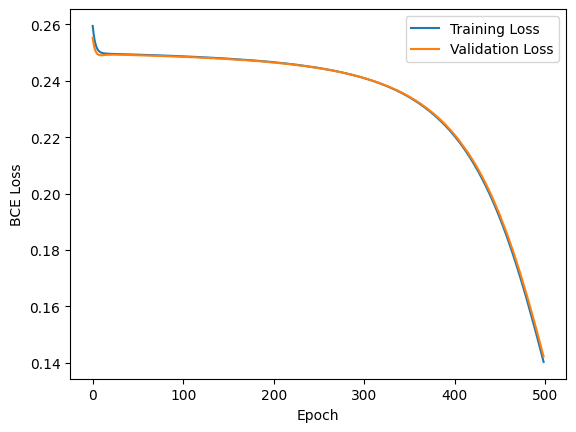

In [149]:
# Plot losses side by side.
plot_losses(classifier_loss_train, classifier_loss_val)

### Quantify accuracy of classifier.

In [150]:
prediction = classifier.predict(X_test)
prediction_error = mean_squared_error(y_test, prediction)
print("Average classifier prediction error: ", prediction_error)

Average classifier prediction error:  0.1416587844597245
